# Project Overview
This project will use unsupervised clustering to conduct customer segmentation based on customer behavior and demographic data from a grocery company. The goal of this project is to discover insights about clusterd patterns of certain customer groups and hence develop constructive strategies for the company to better catering differenet type of customers.

# About the Data
The data is provided by Kaggle, you can open the following link to access the original data and detailed description:
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Importing Necessary Packages

In [43]:
# loading necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Loading Data

In [44]:
# loading data
data = pd.read_csv("D:\DA\PYTHON\project\marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning

In [46]:
# checking NA
print("Number of Na Values in Each Variable:")
data.isna().sum()

Number of Na Values in Each Variable:


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We found missing values in the $Income$ variable. To address this we replace the missing value with the median income.

In [47]:
# Replacing Na Value
data = data.fillna(data["Income"].median())
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Our second step is to change the datatype of $Dt_Customer$ variable from Object to Datetime. This will facilitate out later analysis.

In [48]:
# Change data type to date
print(f'Original data type was: {data["Dt_Customer"].dtypes}')
print('Transforming Date Data ......')
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
print(f'After tansformation the data type is: {data["Dt_Customer"].dtypes}')

Original data type was: object
Transforming Date Data ......
After tansformation the data type is: datetime64[ns]


# Feature Engineering
With all the data cleaned, we will engineer some features to make the dataset more organized and informative for analysis purpose:
- Calculating the $Age$ of the customer from the $Year_Birth$ variable (Assuming data was collected and published in the same year)
- Calculating the $cust_duration$ indicating how long one individual has been a customer of the company
- Simplifying the $Education$ variable into three levels: 'basic', 'median' and 'high' 
- Simplifying the $Marital_Status$ variable into "Paterned" or "Single"
- Creating $Childrenhome$ variable to indicate the total number of children, both kids and teens
- Creating $Total_Product$ indicating total number of goods purchased in various categories
- Creating $Total_Purchases$ indicating total number of purchases from various locations
- Creating $Location$ indicating wheter the customer prefers shopping "instore", "remote", or "balanced"
- Creating $Offer$ indicating the total number of offers a customer accepted in the campaigns


In [49]:
# Creating age and cust_duration
data["age"] = 2021-data["Year_Birth"]
data["cust_duration"] = dt.datetime(2021,2,8) - data["Dt_Customer"]
data["cust_duration"] = data["cust_duration"].dt.days
data[["Year_Birth","age","Dt_Customer","cust_duration"]].head()

,Year_Birth,age,Dt_Customer,cust_duration
0,1957,64,2012-04-09,3227
1,1954,67,2014-08-03,2381
2,1965,56,2013-08-21,2728
3,1984,37,2014-10-02,2321
4,1981,40,2014-01-19,2577


In [50]:
# Simplifying Education
print(data["Education"].value_counts())
data["Education"] = data["Education"].replace({"Graduation":"Basic","2n Cycle":"Medium","Master":"Medium","PhD":"High"})

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [51]:
# Simplifying Marital_Status
print(data["Marital_Status"].value_counts())
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Partnered","Together":"Partnered","Divorced":"Single","Widow":"Single","Alone":"Single","Absurd":"Single","YOLO":"Single"})

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [52]:
# Calculating Childrenhome
data["Childrenhome"] = data["Kidhome"] + data["Teenhome"]

In [53]:
# Calculating Total_Product
data["Total_Product"] = data["MntFishProducts"] +data["MntFruits"] + data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["MntWines"]

In [54]:
# Calculating Total_Purchase and assign Location preference
data["Total_Purchase"] = data["NumStorePurchases"] + data["NumCatalogPurchases"] + data["NumWebPurchases"]
data["NumRemotePurchases"] = data["NumCatalogPurchases"] + data["NumWebPurchases"]

data["Location"] = pd.NA
for i in range(len(data)):
    if(data["NumStorePurchases"][i]/data["Total_Purchase"][i] >0.5):
        data["Location"][i] = 'Instore'
    elif(data["NumStorePurchases"][i]/data["Total_Purchase"][i] <0.5):
        data["Location"][i] = "Remote"
    else:
        data["Location"][i] = "Balance"

C:\Users\PaFuu\AppData\Local\Temp\ipykernel_16244\2927751994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Location"][i] = "Remote"
C:\Users\PaFuu\AppData\Local\Temp\ipykernel_16244\2927751994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Location"][i] = "Balance"
C:\Users\PaFuu\AppData\Local\Temp\ipykernel_16244\2927751994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Location"][i] = 'Instore'
C:\

In [55]:
# Calculating Offer
data["Offer"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

In [56]:
# Drop used columns
droplist = ["ID","Z_CostContact","Z_Revenue","Dt_Customer","Year_Birth","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Kidhome"
            ,"Teenhome","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","MntFruits","MntWines","NumCatalogPurchases","NumWebPurchases"]
data = data.drop(droplist,axis=1)

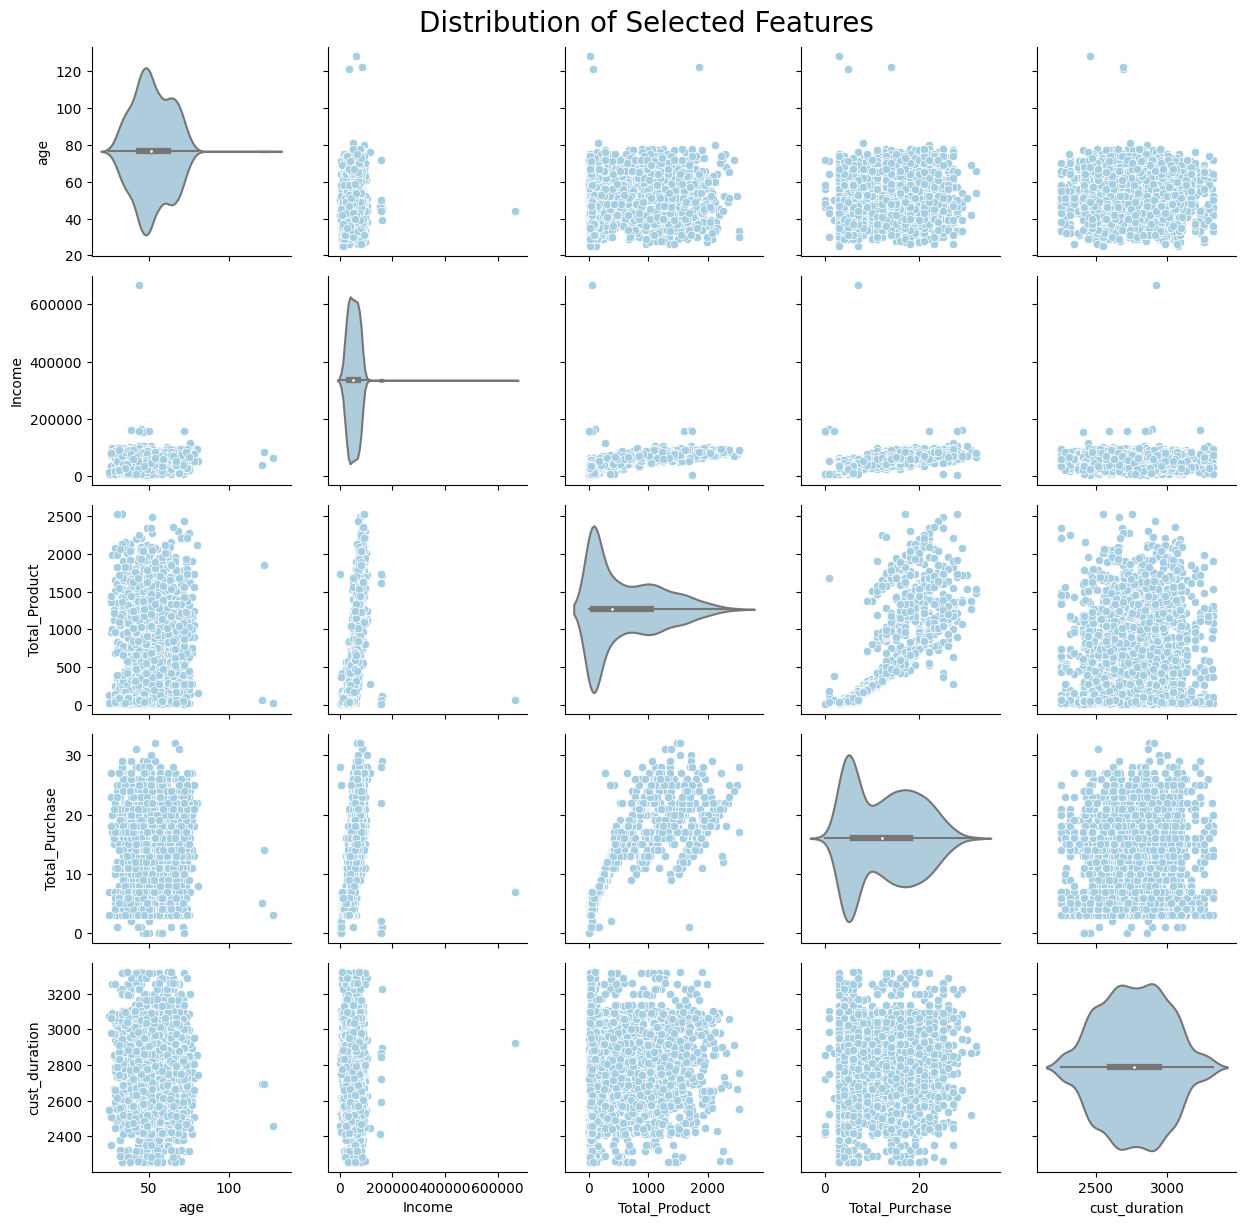

In [57]:
# Check Distribution 
dist_list = ["age","Income","Total_Product","Total_Purchase","cust_duration"]
sns.set_palette("Paired")
g = sns.PairGrid(data[dist_list])
g.map_diag(sns.violinplot)
g.map_offdiag(sns.scatterplot)
g.fig.subplots_adjust(top = 0.95)
g.fig.suptitle("Distribution of Selected Features").set_fontsize(20)


The Plot shows that extreme outliers exists for variable $age$ and $Income$. Let's move those outliers so that the variable distribution is normal.

In [58]:
# Drop outliers
for variable in ["age","Income"]:
    iqr = np.percentile(data[variable], 75) - np.percentile(data[variable],25)
    outlier = np.percentile(data[variable], 75) + 1.5 * iqr
    data = data[data[variable] <= outlier]


In [59]:
# Reset index
data = data.reset_index(drop=True)
data.index

RangeIndex(start=0, stop=2229, step=1)

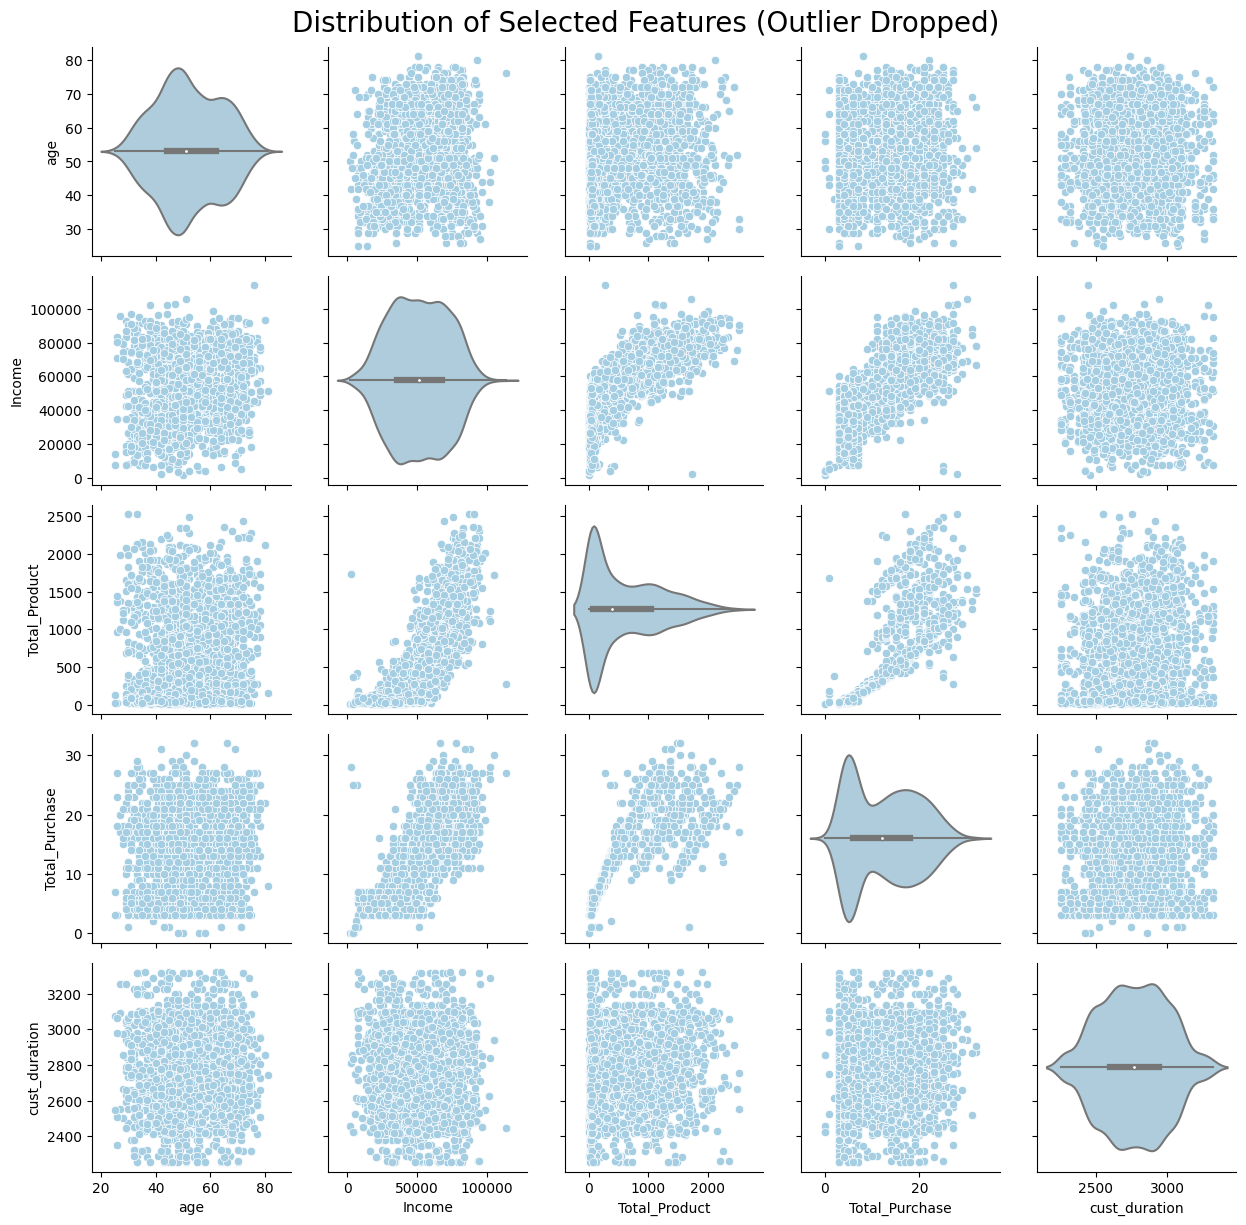

In [60]:
g = sns.PairGrid(data[dist_list])
g.map_diag(sns.violinplot)
g.map_offdiag(sns.scatterplot)
g.fig.subplots_adjust(top = 0.95)
g.fig.suptitle("Distribution of Selected Features (Outlier Dropped)").set_fontsize(20)

Next we will look at the correlation among the numerical features.
Some outstanding findings:
- Income is highly positively correlated to purchase behavior (Total_Product, Total_Purchase)
- Web Visits and number of Children negatively correlated to purchase behavior
- Age and Customer duration does not make much difference to purchase behavior

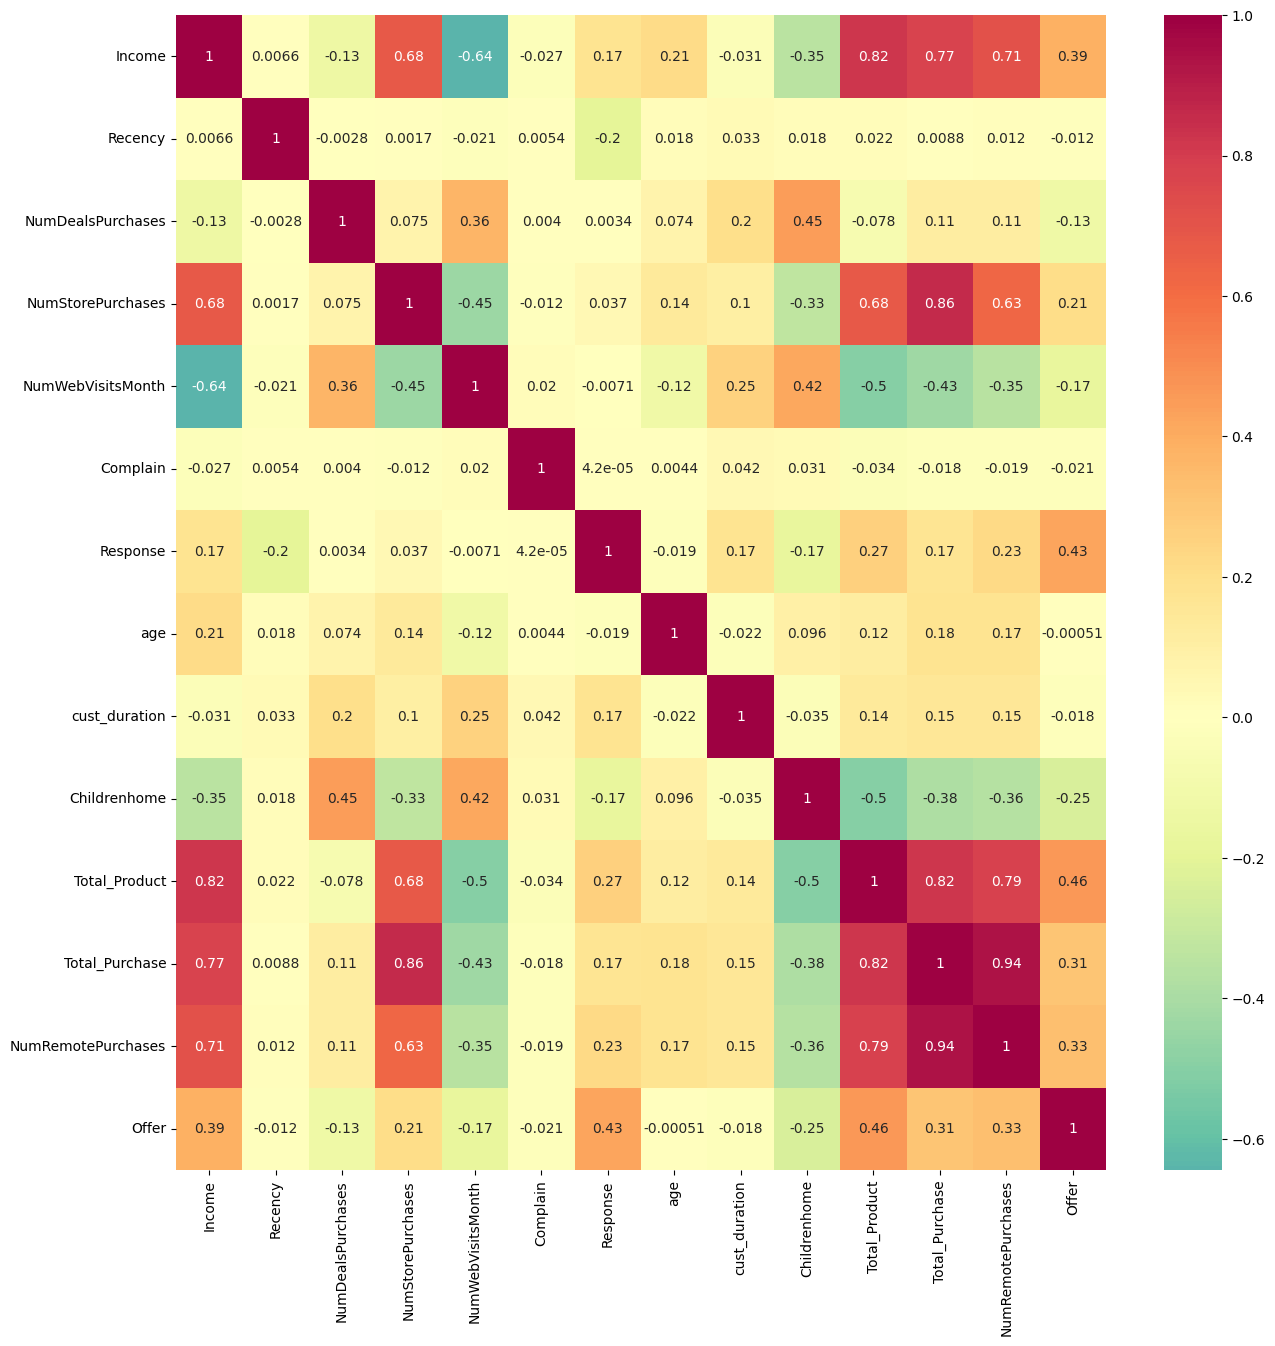

In [61]:
# Check Correlation
plt.figure(figsize=(15,15))
heat = sns.heatmap(data.corr(),annot=True,center = 0,cmap="Spectral_r")

Let's also take a look at the distribution of numeric variables for customer with differenct location preferences.

Looks like instore customers and remote customers have distinctive differences in behavior:
- Instore customers have relatively low income and purchase amount in general, and tends to be new customers
- Remote customers have relatively high income and purchase amount in general, and tends to be old customers


<AxesSubplot:xlabel='NumDealsPurchases', ylabel='Count'>

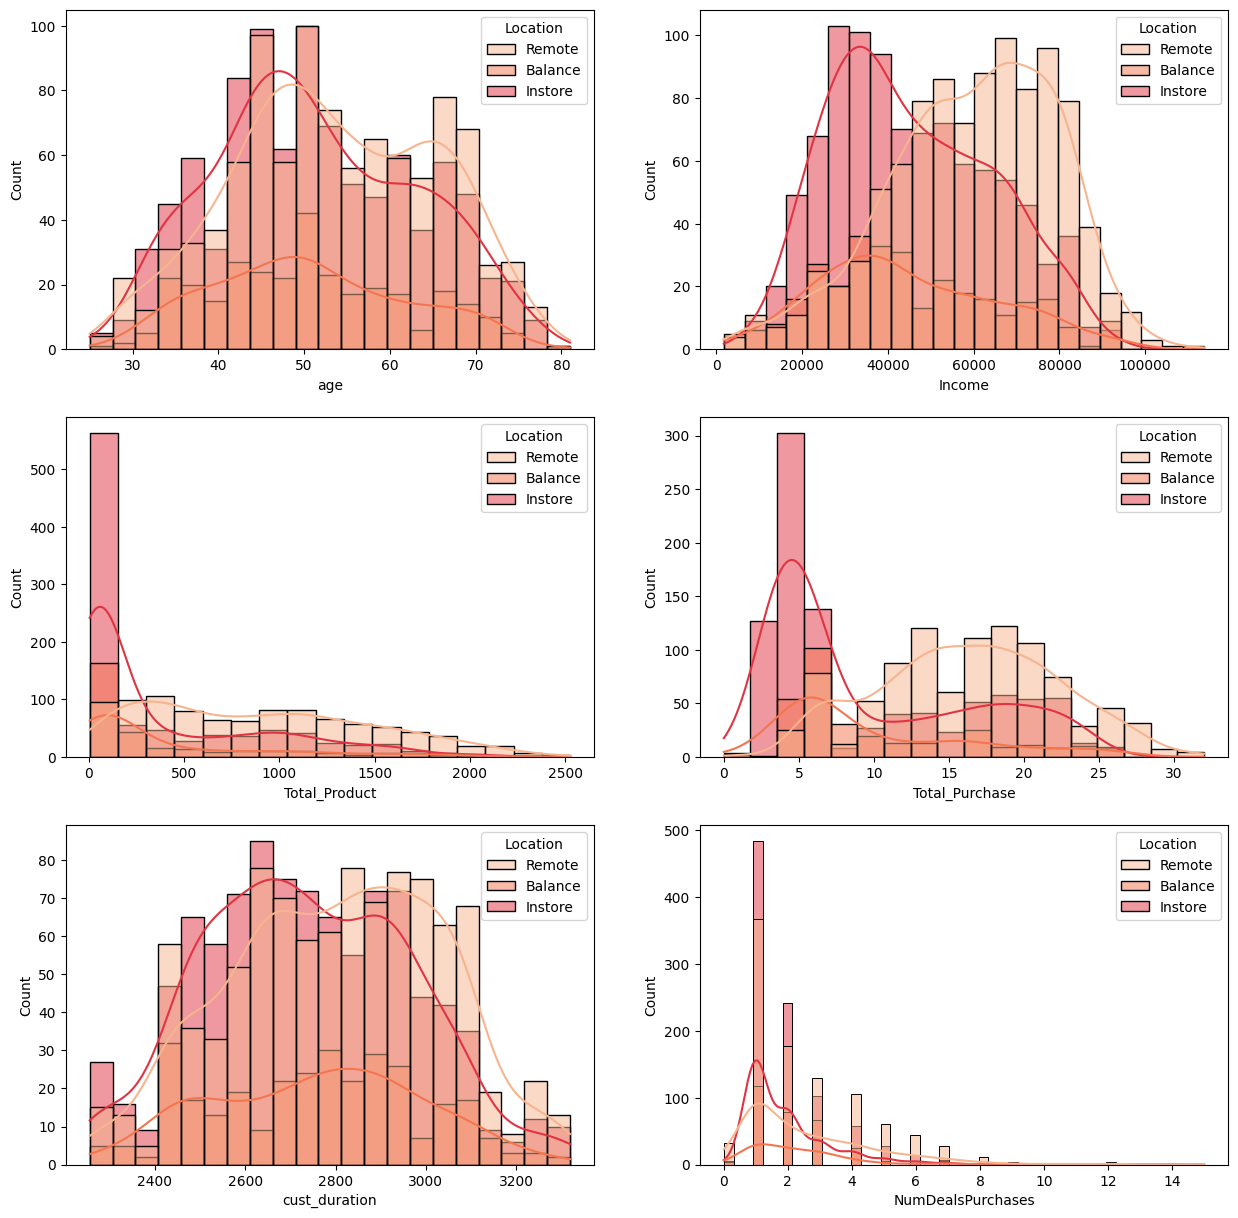

In [62]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
sns.set_palette("rocket_r")
sns.histplot(data=data, x="age", kde=True, ax=axs[0, 0],hue = "Location")
sns.histplot(data=data, x="Income", kde=True, ax=axs[0, 1],hue = "Location")
sns.histplot(data=data, x="Total_Product", kde=True, ax=axs[1, 0],hue = "Location")
sns.histplot(data=data, x="Total_Purchase", kde=True, ax=axs[1, 1],hue = "Location")
sns.histplot(data=data, x="cust_duration", kde=True, ax=axs[2, 0],hue = "Location")
sns.histplot(data=data, x="NumDealsPurchases", kde=True, ax=axs[2, 1],hue = "Location")

Now the data is pretty clean, let's look at the summary of the data.

In [63]:
print(f'The shape of the dataset is : {data.shape}')
data.describe()

The shape of the dataset is : (2229, 17)


,Income,Recency,NumDealsPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,cust_duration,Childrenhome,Total_Product,Total_Purchase,NumRemotePurchases,Offer
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,51619.504262,49.106326,2.319874,5.812472,5.334231,0.008973,0.149843,52.111261,2768.099148,0.951996,605.541050,12.549125,6.736653,0.298789
std,20601.216248,28.946476,1.895252,3.242144,2.414981,0.094319,0.356998,11.707430,232.287894,0.751976,601.032228,7.181785,4.680569,0.679597
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2256.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,35416.000000,24.000000,1.000000,3.000000,3.000000,0.000000,0.000000,44.000000,2597.000000,0.000000,69.000000,6.000000,2.000000,0.000000
50%,51381.500000,49.000000,2.000000,5.000000,6.000000,0.000000,0.000000,51.000000,2769.000000,1.000000,397.000000,12.000000,6.000000,0.000000
75%,68118.000000,74.000000,3.000000,8.000000,7.000000,0.000000,0.000000,62.000000,2942.000000,1.000000,1044.000000,18.000000,10.000000,0.000000
max,113734.000000,99.000000,15.000000,13.000000,20.000000,1.000000,1.000000,81.000000,3319.000000,3.000000,2525.000000,32.000000,28.000000,4.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2229 non-null   object 
 1   Marital_Status      2229 non-null   object 
 2   Income              2229 non-null   float64
 3   Recency             2229 non-null   int64  
 4   NumDealsPurchases   2229 non-null   int64  
 5   NumStorePurchases   2229 non-null   int64  
 6   NumWebVisitsMonth   2229 non-null   int64  
 7   Complain            2229 non-null   int64  
 8   Response            2229 non-null   int64  
 9   age                 2229 non-null   int64  
 10  cust_duration       2229 non-null   int64  
 11  Childrenhome        2229 non-null   int64  
 12  Total_Product       2229 non-null   int64  
 13  Total_Purchase      2229 non-null   int64  
 14  NumRemotePurchases  2229 non-null   int64  
 15  Location            2229 non-null   object 
 16  Offer 

# Dimensionality Reduction (PCA)

We now have 17 factors in total for our clustering model. However, within these factors, many of them are correlated and contain less information we need. As a result, we will perform Dimensionality Reduction to narrow down the features that contains the most useful information before the clustering process.

### The technique we are going to use is call Principal Component Analysis (PCA): 
PCA will help us reducing the number of variables in the dataset while preserving as much variation (information) as possible. PCA achieve this by creating new variables called principle components (PCs), which are linear combinations of the original variables. The first PC will capture highest variation, the second PC will capture the hightest one and so on. Our goal is to determine how many PCs we want so that we could have fewer variables while maintain good amount of information.

### To prepare for PCA and clustering, we will perform the following steps:
- Encoding the categorical variables to make them "numerical"
- Using Standard Scalar to scale the features
- Determining the number of components used for PCA by ploting Cumulative Explained Variation against # components

In [65]:
# Label encoding categorical features
cat_tf = data.dtypes == "object"
cat = list(data.columns[cat_tf])
print("The Categorica Variables in the Dataset Are:", cat)

The Categorica Variables in the Dataset Are: ['Education', 'Marital_Status', 'Location']


In [66]:
# Making a copy of the data
data_copy = data.copy()
LE = LabelEncoder()
for i in cat:
    data_copy[i] = data_copy[[i]].apply(LE.fit_transform)

In [67]:
# Scaling the features
scaled = StandardScaler().fit_transform(data_copy.values)
scaled_df = pd.DataFrame(scaled,columns=data_copy.columns)
scaled_df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,cust_duration,Childrenhome,Total_Product,Total_Purchase,NumRemotePurchases,Location,Offer
0,-0.863184,1.345676,0.316484,0.307314,0.358938,-0.559160,0.689920,-0.095152,2.381943,1.015715,1.976013,-1.266277,1.683247,1.316246,2.406945,1.007444,-0.439754
1,-0.863184,1.345676,-0.256135,-0.383771,-0.168815,-1.176175,-0.138430,-0.095152,-0.419825,1.272020,-1.666837,1.393978,-0.962795,-1.190657,-1.012209,-1.858661,-0.439754
2,-0.863184,-0.743121,0.970719,-0.798422,-0.696567,1.291882,-0.552605,-0.095152,-0.419825,0.332234,-0.172666,-1.266277,0.283674,1.037701,0.697368,-1.858661,-0.439754
3,-0.863184,-0.743121,-1.212506,-0.798422,-0.168815,-0.559160,0.275745,-0.095152,-0.419825,-1.291031,-1.925195,0.063851,-0.919526,-0.912112,-1.012209,-0.425608,-0.439754
4,0.323760,-0.743121,0.324010,1.551268,1.414444,0.057854,-0.138430,-0.095152,-0.419825,-1.034726,-0.822867,0.063851,-0.305445,0.202067,0.269974,1.007444,-0.439754


To check how many Principal Components we want, we will plot the cumulative variation ratio. Cumulative variation ratio shows the total percentage of the variance explained by the first n components. We want n to be as small as possible while keep the ratio high.

In this project, we set the desired ratio to be 90%, meaning we want to preserve 90% of the variation (information) in the dataset.

According to the graph, the corresponding n_components is 9, meaning the first 9 PCs will contain 90% of the variation. Thus we will create 9 PCs during PCA.

Text(0, 0.5, 'Cumulative Explained Variation Ratio')

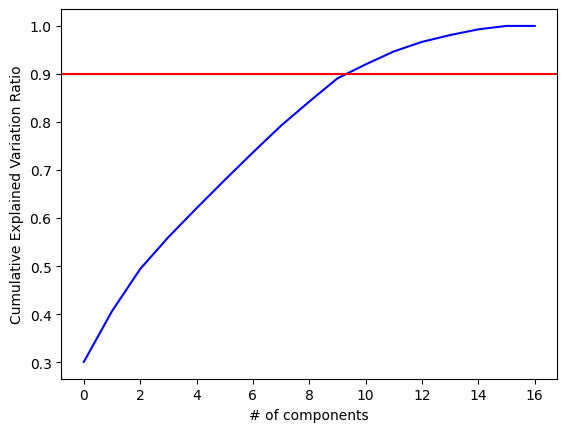

In [68]:
# Plotting explained variance ratio plot
pca = PCA()
pca.fit(scaled_df)
features = range(pca.n_components_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum,color="blue")
plt.axhline(y=0.9,color="red")
plt.xlabel("# of components")
plt.ylabel("Cumulative Explained Variation Ratio")

In [69]:
# Performing PCA with n_components = 9
pca = PCA(n_components=9,random_state=42)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df))
PCA_df.describe()

,0,1,2,3,4,5,6,7,8
count,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03
mean,6.375440e-18,3.825264e-17,2.151711e-17,-3.665878e-17,5.737896e-17,-2.311097e-17,5.578510e-17,-3.108027e-17,-5.737896e-17
std,2.261305e+00,1.340834e+00,1.221261e+00,1.061745e+00,1.011793e+00,9.992111e-01,9.884353e-01,9.740259e-01,9.231217e-01
min,-5.857296e+00,-2.973963e+00,-3.186141e+00,-3.206528e+00,-2.534322e+00,-1.474271e+00,-2.710157e+00,-2.933271e+00,-2.541284e+00
25%,-2.167285e+00,-9.356151e-01,-8.478203e-01,-7.320562e-01,-7.318644e-01,-3.577367e-01,-7.201134e-01,-7.282177e-01,-6.582378e-01
50%,-2.726097e-01,-1.902364e-01,-2.310368e-01,2.390707e-02,-1.258779e-01,-6.642454e-02,-3.862773e-02,-2.629030e-02,-7.342329e-02
75%,1.950588e+00,7.401496e-01,5.772328e-01,7.419387e-01,6.996993e-01,2.076098e-01,6.752179e-01,6.797332e-01,6.135679e-01
max,6.059356e+00,6.026124e+00,4.161504e+00,3.620720e+00,5.112385e+00,1.044049e+01,3.217726e+00,3.550041e+00,3.984301e+00


We have finished PCA! Let's visualize the first three Principal Components to see how it looks like.

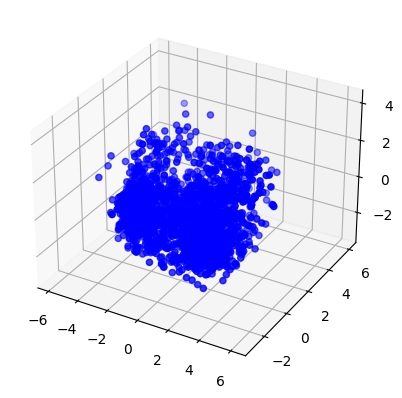

In [70]:
x = PCA_df[0]
y = PCA_df[1]
z = PCA_df[2]
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c = "blue")
plt.show()

# Clustering
We've finally gone to the clustering part. In this part we will perform K-means clustering to classify customers into different segments.

K-means Clustering is a simple but popular technique to segmentation. Like it's name, K-means Clustering aims to partition the dataset into K cluters, and each cluster is represented by it centroid (the mean points in the cluster)

# Elbow Method

Just like PCA, we also need to specify the right number of clusters we want in the model. To do so we have to balance the Inertia and number of clusters. More clusters leads to lower inertia, meaning the clusters are more compacted and well-seperated from each other. However, when cluster number gets too high the model will lose it's informative nature as each datapoint will just become one distinct cluster.

To address we will use the elbow method by plotting the inertia against # of clusters: 
We will find the "elbow" of the plot, that is, the point where adding one additional cluster doesn't lead to significant drop in inertia.

C:\Users\PaFuu\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PaFuu\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PaFuu\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PaFuu\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

([<matplotlib.axis.XTick at 0x10f67e58bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

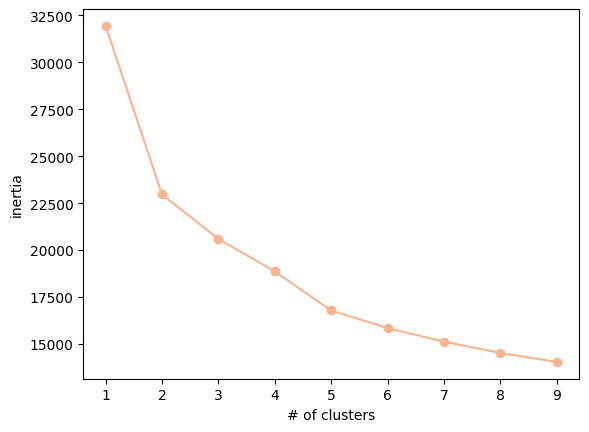

In [71]:
# Using elbow method
ks = range(1,10)
intertia = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_df)
    intertia.append(model.inertia_) 

plt.plot(ks,intertia,'-o')
plt.xlabel("# of clusters")
plt.ylabel("Inertia")
plt.xticks(ks)

According the the graph, inertia started to level off after the second cluster, but we will choose 3 this time so clusters will be more seperated.

In [72]:
# Performing Clustering with k=3
kmeans = KMeans(n_clusters = 3,random_state=42)
y_kmeans = kmeans.fit_predict(PCA_df)
PCA_df['Label'] = y_kmeans
data["label"] = y_kmeans

C:\Users\PaFuu\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We've got out clustered model, let's visualize it on the PCA plot earlier:

It seems like our model successfully seperated the dataset into three distinct clusters!

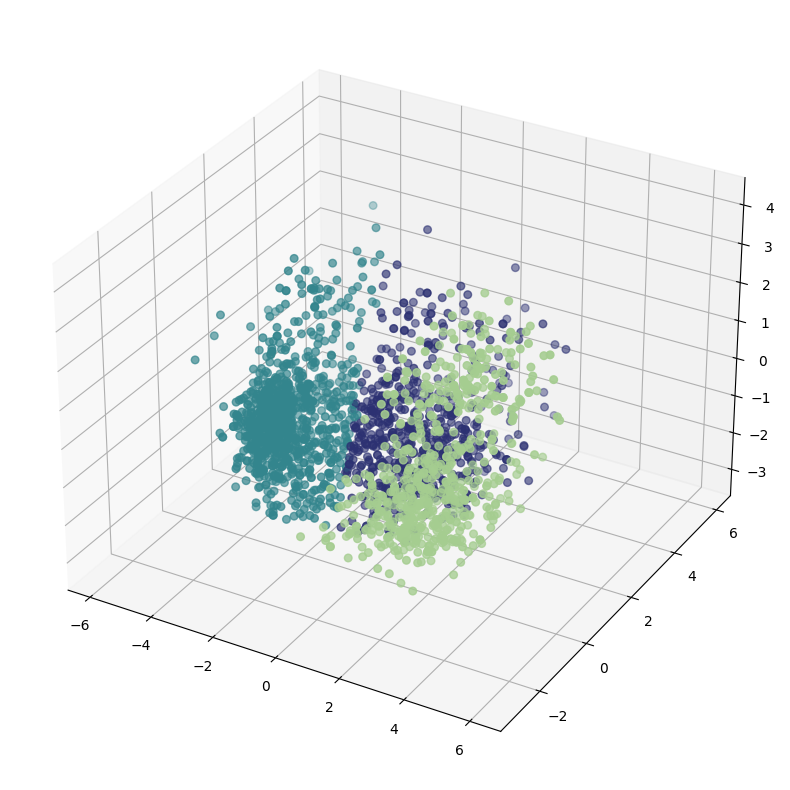

In [73]:
# Visualize the results
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111,projection = "3d",label = "bla")
ax.scatter(x,y,z,c = PCA_df["Label"],cmap="crest",s = 30)

# Data Interpretation

We've got our clusters, but we still need to figure out how each cluster is different from one another. As a result, we will go back to our original dataset to analyse the difference between each cluster in terms of there demographic feature and purchasing behavior.

We will perform the following steps:
- Checking cluster size
- Visualizing numerical data
- Visualizing categorical data

### Cluster Size
It seems most customers belong to cluster 1 (around 1000) and equal number of customers from cluster 2 and cluster 0 (around 600 each)

<AxesSubplot:xlabel='label', ylabel='count'>

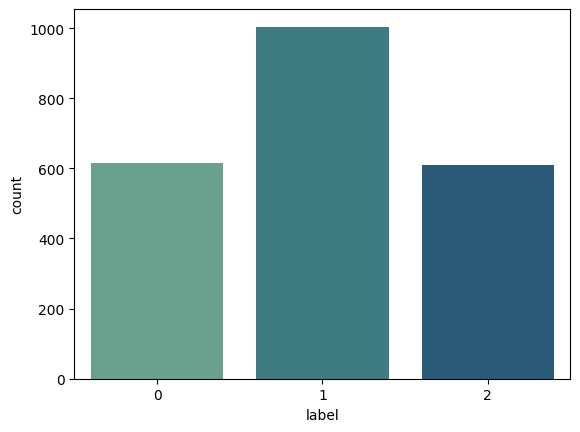

In [74]:
# Checking cluster size
sns.countplot(x = data["label"],palette="crest")

### Numerical Data Findings

#### Income Distribution:
- Customers in Cluster 1 have relatively low-medium income
- Customers in Cluster 2 have relatively medium-high income
- Customers in Cluster 0 have relatively high income
#### Purchase Behavior: 
- Customers in Cluster 1 have relatively low purchase rate
- Customers in Cluster 2 have relatively medium purchase rate
- Customers in Cluster 0 have relatively high purchase rate
- Customers in Cluster 2 have the most deal purchase rate and web visit rate 

 

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Income'>

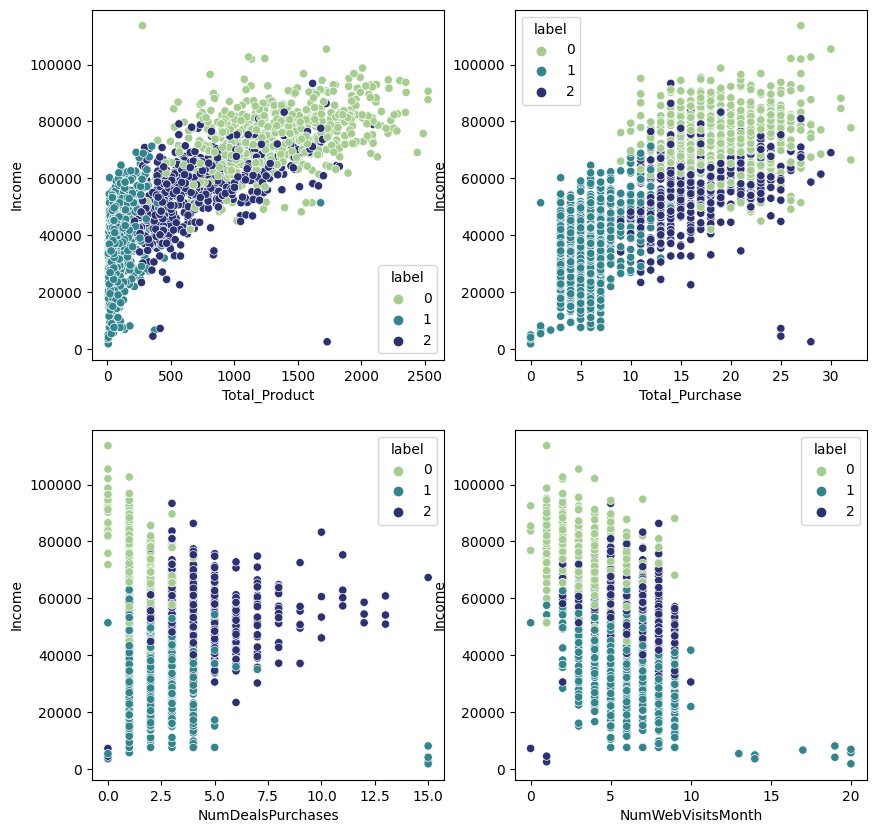

In [75]:
# Visualizing numerical data
fig, axs = plt.subplots(2,2 ,figsize=(10, 10))
sns.scatterplot(data = data,x="Total_Product",y="Income",hue = "label",palette="crest",ax=axs[0,0])
sns.scatterplot(data = data,x="Total_Purchase",y="Income",hue = "label",palette="crest",ax=axs[0,1])
sns.scatterplot(data = data,x="NumDealsPurchases",y="Income",hue = "label",palette="crest",ax=axs[1,0])
sns.scatterplot(data = data,x="NumWebVisitsMonth",y="Income",hue = "label",palette="crest",ax=axs[1,1])

### Categorical Data Findings

#### Children Home:
- Most Customers in Cluster 0 are not parents (no children at home)
- Most Customers in Cluster 1 and 2 are parents

#### Purchase Location Preference:
- Most Customers in Cluster 0 and 2 prefer remote shopping (shop online or from catalogue)
- Most Customers in Cluster 1 prefer shop instore

#### Shopping Campaign:
- Only Customers in Cluster 0 accepted multiple offers from the campaign
- Most Customers in Cluster 1 and 2 have never participated in the campaign or only once


<AxesSubplot:xlabel='label', ylabel='count'>

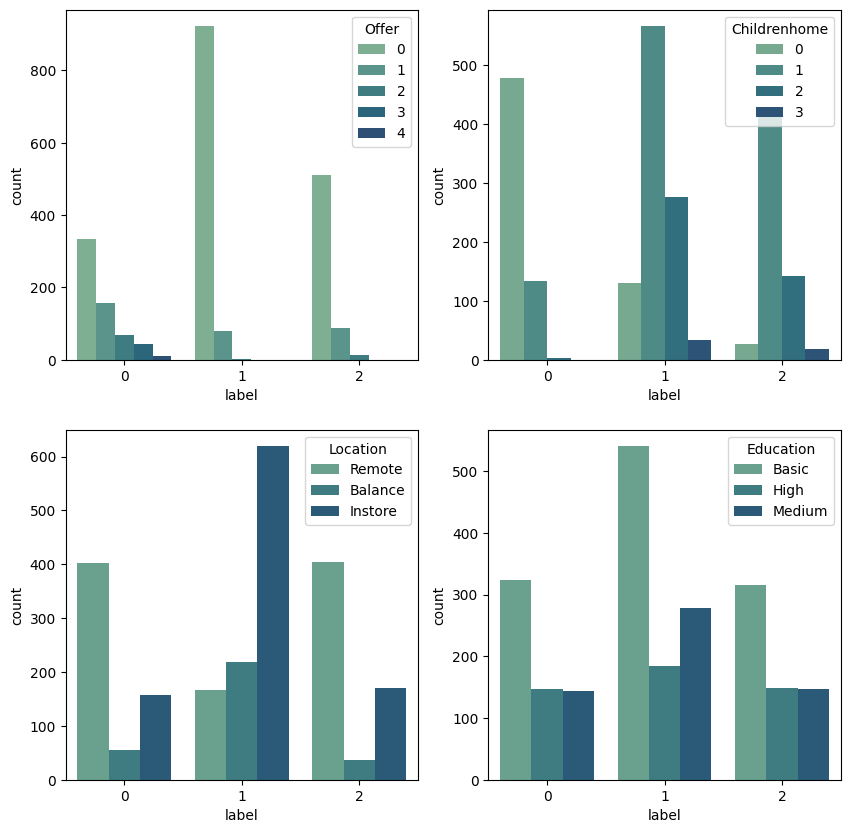

In [76]:
fig, axs = plt.subplots(2,2 ,figsize=(10, 10))
sns.countplot(data,x = "label",palette="crest",hue =data["Offer"],ax=axs[0,0])
sns.countplot(x = data["label"],palette="crest",hue =data["Childrenhome"],ax=axs[0,1])
sns.countplot(data,x="label",palette="crest",hue =data["Education"],ax=axs[1,1])
sns.countplot(x = data["label"],palette="crest",hue =data["Location"],ax=axs[1,0])


